# Data Mining Techniques - Project 1

Eleftheria Vrachoriti

Start by importing all the libraries that we are going to use later.

In [1]:
import pandas as pd
import datetime
import sys

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

import matplotlib
%matplotlib inline

Mount our drive in order to load the .csv file.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Question 1 - Data preprocessing/cleaning

Load the .csv file, create a data frame for our data and print the first 5 rows.

In [3]:
df = pd.read_csv('gdrive/MyDrive/marketing_campaign.csv', sep='\t')
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Check for null values and obtain the data type of each column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

For the column <code>Income</code>, 2216 out of 2240 rows contain non-null values.

The percentage of the rows containing null values for this column is small

$
\begin{aligned}
  \frac{2240 - 2216}{2240} = \frac{24}{2240} \approx 0.01
\end{aligned}
$,

so we can safely remove them from out dataframe.

In [5]:
is_nan_income = df['Income'].isnull()
nan_income_rows = df[is_nan_income]
nan_income_row_indices = list(nan_income_rows.index) # list of indices (not ids) of rows containing null values for column Income.

df = df.drop(nan_income_row_indices) # drop rows

Verify changes made above by printing the result of <code>df.info</code> again.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Our data frame now consists of 2216 rows that contain only non-null values.

<code>Dt_customer</code> represents a date in dd-mm-yyyy form and is stored as an <code>object</code> in our dataframe.

We can convert all dates from <code>objects</code> to <code>DateTime objects</code> in the following way:

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

Verify changes made above.

In [8]:
print(df['Dt_Customer'].info())

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB
None


Now the data type of column <code>Dt_customer</code> is <code>datetime64</code>, as intended.

<code>Marital_Status</code> and <code>Education</code> columns can be converted to arithmetic values, as seen in **Question 7**.

# Question 2 - Unique values of columns <code>Marital_Status</code> and <code>Education</code>

Print unique values of column <code>Marital_Status</code> and the number of rows of each value.

In [9]:
marital_status = df.groupby('Marital_Status')
temp_df = marital_status.count()
print(temp_df['ID'])

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     857
Single      471
Together    573
Widow        76
YOLO          2
Name: ID, dtype: int64


Change values <code>'Alone'</code>, <code>'Absurd'</code>, <code>'YOLO'</code> to <code>'Single'</code>.

In [10]:
to_be_replaced = ['Alone', 'Absurd', 'YOLO']
df['Marital_Status'] = df['Marital_Status'].replace(to_be_replaced, 'Single')

Verify changes made above by printing the unique values of column <code>Marital_Status</code> again.

In [11]:
marital_status = df.groupby('Marital_Status')
temp_df = marital_status.count()
print(temp_df['ID'])

Marital_Status
Divorced    232
Married     857
Single      478
Together    573
Widow        76
Name: ID, dtype: int64


We can see that the number of rows in which the values were replaced has been added to the number of rows with the value <code>'Single'<code>.

Create plot to visualize data.

<Axes: xlabel='Marital_Status'>

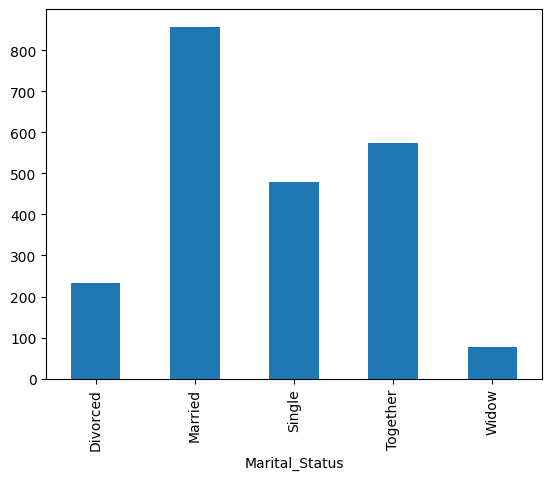

In [12]:
temp_df['ID'].plot.bar()

Print unique values of column <code>Education</code> and the number of rows of each value.

In [13]:
education = df.groupby('Education')
temp_df = education.count()
print(temp_df['ID'])

Education
2n Cycle       200
Basic           54
Graduation    1116
Master         365
PhD            481
Name: ID, dtype: int64


Group <code>2n Cycle</code> and <code>Basic</code>.

Group <code>Master</code> and <code>PhD</code>.

In [14]:
df['Education'] = df['Education'].replace('2n Cycle', 'Basic')
df['Education'] = df['Education'].replace('PhD', 'Master')

Verify changes made above.

In [15]:
education = df.groupby('Education')
temp_df = education.count()
print(temp_df['ID'])

Education
Basic          254
Graduation    1116
Master         846
Name: ID, dtype: int64


We can see that the number of rows in which the values were replaced has been added to the number of rows with the values <code>'Basic'</code> and <code>Master</code> respectively.

Create plot to visualize data.

<Axes: xlabel='Education'>

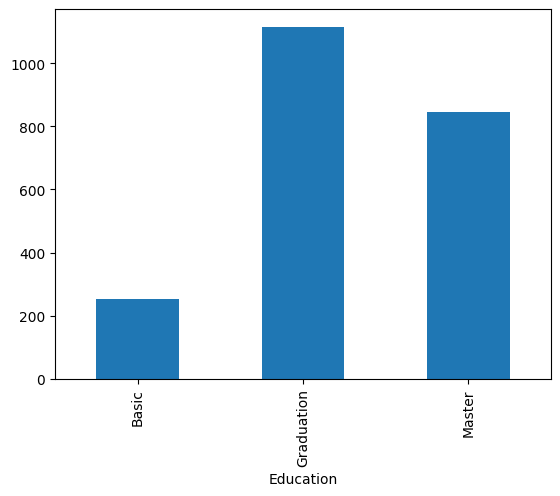

In [16]:
temp_df['ID'].plot.bar()

# Question 3 - Create new attributes

### <code>Customer_For</code> column

Stores the number of days someone has been a customer.

Recency represents the number of days passed since the last purchase of each customer.

The new attribute's values are equal to the number of days between their first and most recent purchase.

In [17]:
today = datetime.date.today()
today_datetime = datetime.datetime(year=today.year, month=today.month, day=today.day)

df['Customer_For'] = (today_datetime - pd.to_timedelta(df['Recency'], unit = 'd') - df['Dt_Customer']).dt.days # convert from timedelta64 to int64

Verify changes made above.

In [18]:
print(df['Customer_For'].info())

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 0 to 2239
Series name: Customer_For
Non-Null Count  Dtype
--------------  -----
2216 non-null   int64
dtypes: int64(1)
memory usage: 34.6 KB
None


In [19]:
print(df['Customer_For'].head())

0    3830
1    3300
2    3511
3    3338
4    3292
Name: Customer_For, dtype: int64


The data type of column <code>Customer_For</code> is <code>int64</code>, as intended.

### <code>Age</code> column

This column stores the age of each customer as of 2023.

In [20]:
df['Age'] = today.year - df['Year_Birth']

### <code>Spent</code> column

This column stores the money spent in all categories for each customer.

In [21]:
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

### <code>ChildrenHome</code> column

This column stores the number of children of each customer, including kids and teenagers.

In [22]:
df['Children_Home'] = df['Kidhome'] + df['Teenhome']

### <code>Family_Size</code> column

This column stores the number members of each household.

In [23]:
adults_home = {'Divorced': 1, 'Married': 2, 'Single': 1, 'Together': 2, 'Widow': 1}

df['Family_Size'] = df.apply(lambda row: adults_home[row['Marital_Status']] + row['Children_Home'], axis = 1)

### <code>Is_Parent</code> column

This column indicates if a customer is a parent.

In [24]:
df['Is_Parent'] = df.apply(lambda row: 0 if row['Children_Home'] == 0 else 1, axis = 1)

### <code>Living_With</code> column

This column indicates if a customer is has a partner or is living on his own.

In [25]:
df['Living_With'] = df.apply(lambda row: 'Partner' if row['Marital_Status'] == 'Married' or row['Marital_Status'] == 'Together' else 'Alone', axis = 1)

### <code>Age_Group</code> column

This column stores the age group of each customer.

In [26]:
def age_group(age):
  if 21 <= age and age <= 30:
    return "21-30"
  if 31 <= age and age <= 40:
    return "31-40"
  if 41 <= age and age <= 50:
    return "41-50"
  if 51 <= age and age <= 60:
    return "51-60"
  if 61 <= age and age <= 70:
    return "61-70"
  if 71 <= age and age <= 80:
    return "71-80"
  return ">80"

df['Age_Group'] = df.apply(lambda row: age_group(row['Age']), axis = 1)

# Question 4 - Detect and eliminate outliers

We have already removed any rows containing NaN values in **Question 1**.

<code>Id</code>, <code>Education</code>, <code>Marital_Status</code>, <code>Dt_Customer</code>, <code>AcceptedCmp1</code>, <code>AcceptedCmp2</code>, <code>AcceptedCmp3</code>, <code>AcceptedCmp4</code>, <code>AcceptedCmp5</code>, <code>Complain</code>, <code>Response</code>, <code>Is_Parent</code>, <code>Living_With</code> and <code>Age_Group</code> columns are excluded from outlier detection, because they contain categorical values.

<code>Year_Birth</code> column is excluded from outlier detection, because it will be applied on <code>Age</code> column.

<code>Z_CostContact</code> and <code>Z_Revenue</code> columns are excluded from outlier detection, because all rows have the same value, as seen from the histograms given below.

<Axes: xlabel='Z_CostContact'>

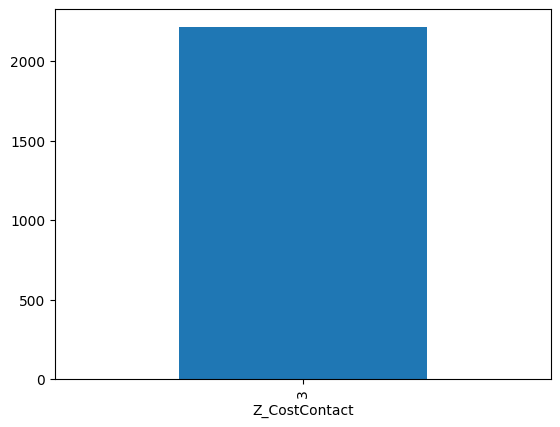

In [27]:
z_cost_contact = df.groupby('Z_CostContact')
temp_df = z_cost_contact.count()
temp_df['ID'].plot.bar()

<Axes: xlabel='Z_Revenue'>

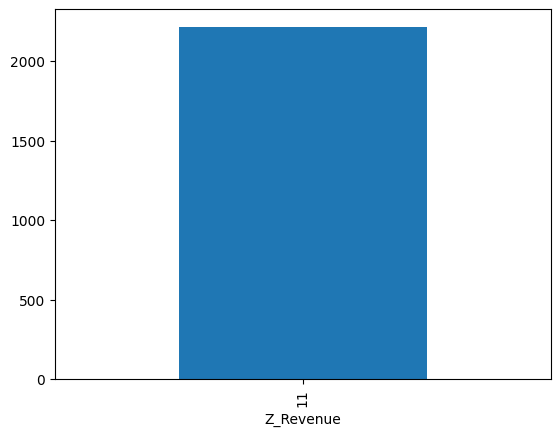

In [28]:
z_revenue = df.groupby('Z_Revenue')
temp_df = z_revenue.count()
temp_df['ID'].plot.bar()

For the rest of the columns, we can apply the Z-score method for scaling, which is derived from the Normal distrubution $N(μ, σ)$ and is based on the following formula:

$
\begin{aligned}
Zscore(x) = \frac{x - μ}{σ}
\end{aligned}
$, where

$x$: the value that is examined

$μ$: the mean of the distribution

$σ$: the standard deviation of the distribution
<br></br>

This can help us detect and eliminate the outliers.
<br></br>

After calculating the Z-score for every value in the examined column, we can find the rows with a score less than $-3$ or greater than $3$ and eliminate them.

This keeps $\approx 99.7\%$ of data affected.


In [29]:
all_columns = list(df.columns.values)
# columns not used for outlier detection and elimination for reasons stated above
excluded_columns = ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue',
                       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                       'Complain', 'Response', 'Is_Parent', 'Living_With', 'Age_Group']
examined_columns = [column for column in all_columns if column not in excluded_columns]
# columns that will be examined for outlier detection and elimination

for column in examined_columns:
  mean = df[column].mean()
  std = df[column].std()

  z_score = df.apply(lambda row: (row[column] - mean)/std, axis = 1) # Z-score

  outliers = (z_score < -3) | (z_score > 3)
  rows = df[outliers]
  row_indices = list(rows.index)
  df = df.drop(row_indices)

Verify changes made above.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 1 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1822 non-null   int64         
 1   Year_Birth           1822 non-null   int64         
 2   Education            1822 non-null   object        
 3   Marital_Status       1822 non-null   object        
 4   Income               1822 non-null   float64       
 5   Kidhome              1822 non-null   int64         
 6   Teenhome             1822 non-null   int64         
 7   Dt_Customer          1822 non-null   datetime64[ns]
 8   Recency              1822 non-null   int64         
 9   MntWines             1822 non-null   int64         
 10  MntFruits            1822 non-null   int64         
 11  MntMeatProducts      1822 non-null   int64         
 12  MntFishProducts      1822 non-null   int64         
 13  MntSweetProducts     1822 non-nul

$394$ rows were removed from the dataset.

# Question 5 - Correlation of characteristics

Categorical columns are not used in this Question.

The correlation matrix can be retrieved using <code>pd.corr()</code> function.

<Axes: >

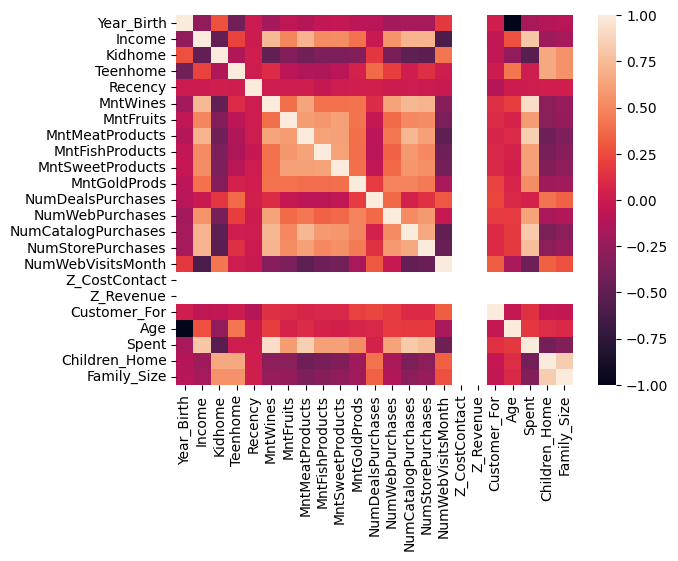

In [31]:
categorical_columns = ['ID', 'Education', 'Marital_Status', 'Dt_Customer',
                       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                       'Complain', 'Response', 'Is_Parent', 'Living_With', 'Age_Group']
# columns that contain categorical values

heatmap_columns = [column for column in all_columns if column not in categorical_columns]
# columns that will be used for the heatmap plot

sns.heatmap(df[heatmap_columns].corr())

We can see that <code>Year_Birth</code> and <code>Age</code> columns are heavily correlated, as expected.

# Question 6 - Plots

### Complain

[Text(0, 0, '1803'), Text(0, 0, '19')]

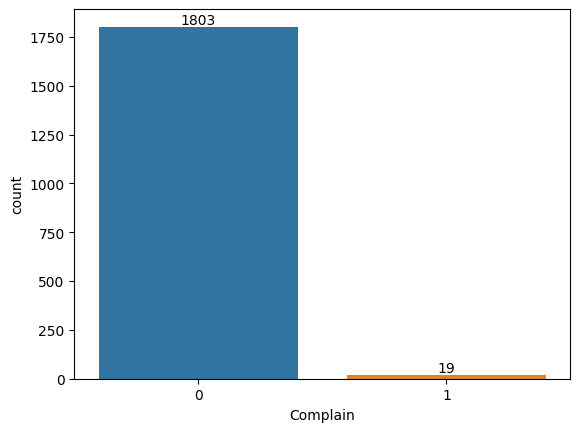

In [32]:
ax = sns.countplot(df, x='Complain')
ax.bar_label(ax.containers[0])

### Marital status - Spent

<Axes: xlabel='Marital_Status', ylabel='Spent'>

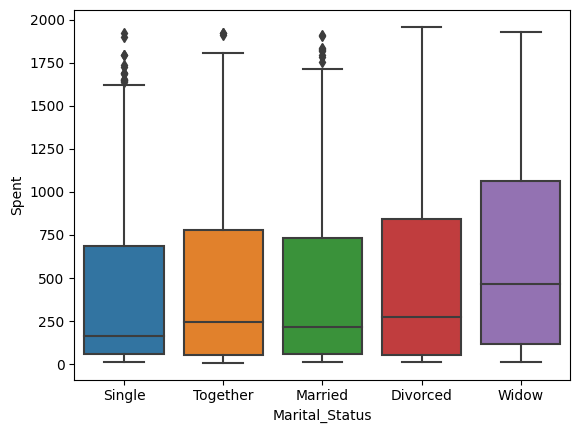

In [33]:
sns.boxplot(df, x="Marital_Status", y="Spent")

### Age group - Spent

<Axes: xlabel='Age_Group', ylabel='Spent'>

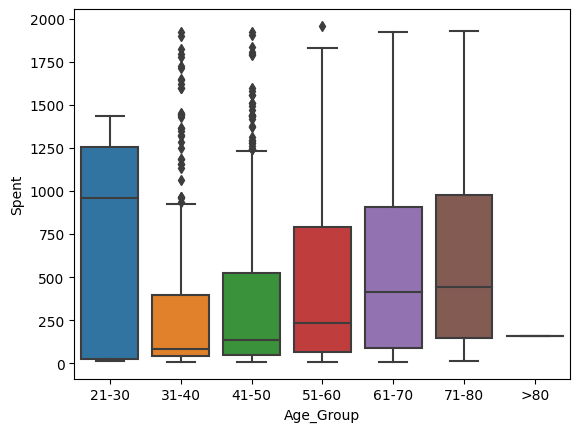

In [34]:
columns_order = df['Age_Group'].unique()
columns_order.sort() # sort for better visualization

sns.boxplot(df, x="Age_Group", y="Spent", order=columns_order)

### Education - Income

<Axes: xlabel='Education', ylabel='Income'>

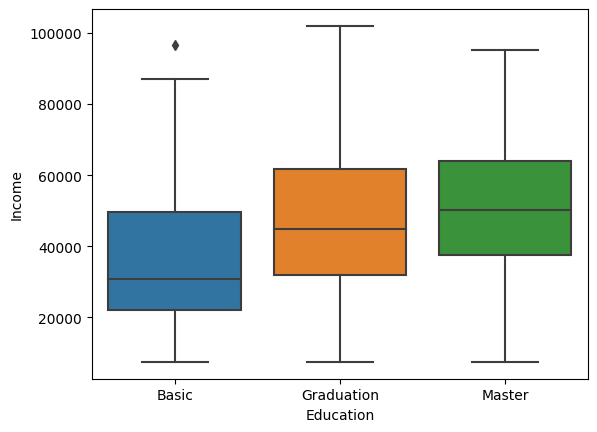

In [35]:
columns_order = ['Basic', 'Graduation', 'Master']

sns.boxplot(df, x="Education", y="Income", order=columns_order)

### Income - Family_Size

<Axes: xlabel='Family_Size', ylabel='Income'>

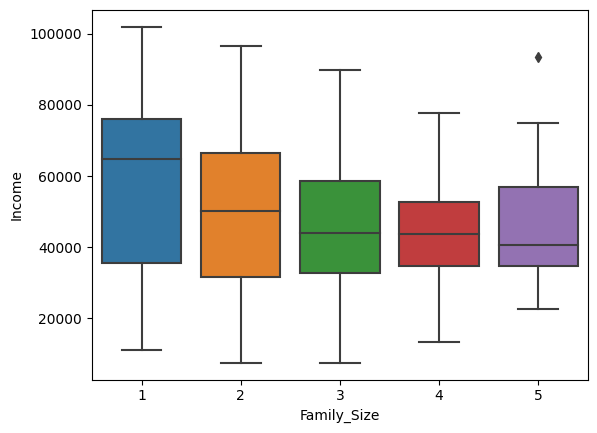

In [36]:
sns.boxplot(df, x="Family_Size", y="Income")

### Income - Number of children

<Axes: xlabel='Children_Home', ylabel='Income'>

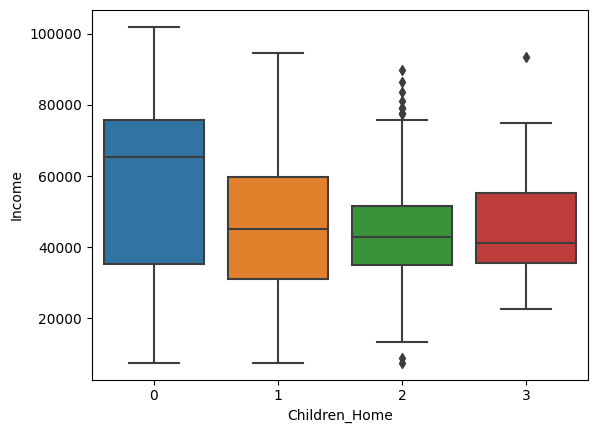

In [37]:
sns.boxplot(df, x="Children_Home", y="Income")

### Income - Living With

<Axes: xlabel='Living_With', ylabel='Income'>

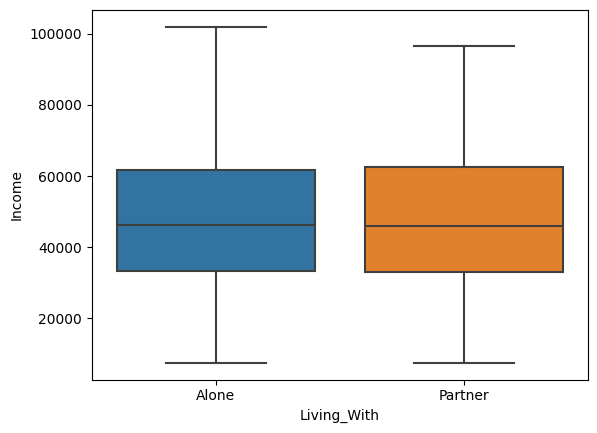

In [38]:
sns.boxplot(df, x="Living_With", y="Income")

### NumDealsPurchases

<Axes: xlabel='NumDealsPurchases'>

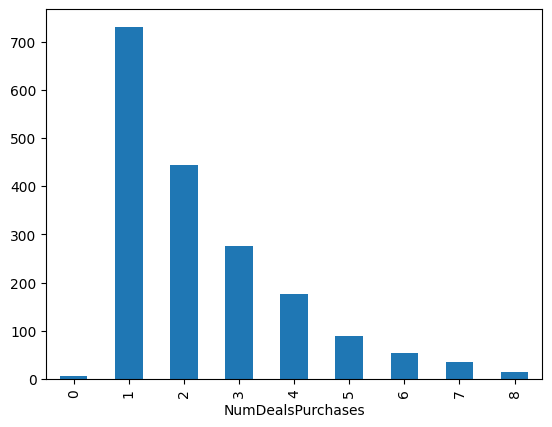

In [39]:
num_deals_purchases = df.groupby('NumDealsPurchases')
temp_df = num_deals_purchases.count()
temp_df['ID'].plot.bar()

### Kids in home

<Axes: xlabel='Kidhome'>

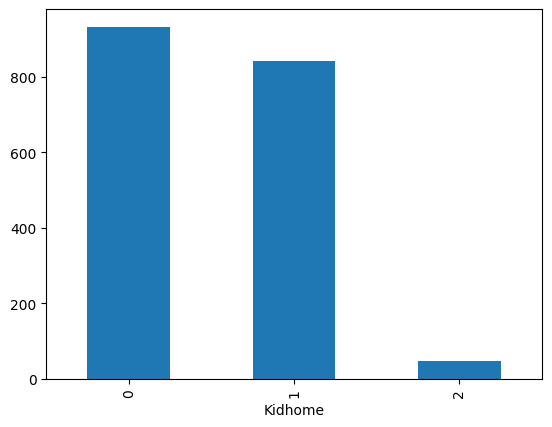

In [40]:
kid_home = df.groupby('Kidhome')
temp_df = kid_home.count()
temp_df['ID'].plot.bar()

### Family Size

<Axes: xlabel='Family_Size'>

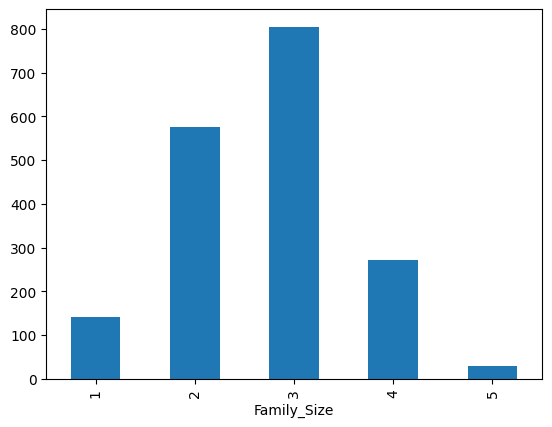

In [41]:
family_size = df.groupby('Family_Size')
temp_df = family_size.count()
temp_df['ID'].plot.bar()

# Question 7 - Principal Component Analysis (PCA)

Create a copy of the dataframe with only three columns: <code>Education</code>, <code>Marital_Status</code> and <code>Living_With</code>.
<br></br>

Use label encoding for each column in order to convert the categorical values to arithmetic data.

In [42]:
columns = ['Education', 'Marital_Status', 'Living_With']
df_1 = df[columns].copy()

encoder = preprocessing.LabelEncoder() # initialize label encoder

for column in columns:
  df_1[column] = encoder.fit_transform(df[column])

Create another copy of the dataframe, in which all columns contain numerical values and are irrelevant to any marketing campaigns.

In [43]:
all_columns = list(df.columns.values)

marketing_related_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']
# marketing-related columns will not be used for clustering

categorical_columns = ['ID', 'Education', 'Marital_Status', 'Dt_Customer',
                       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                       'Complain', 'Response', 'Is_Parent', 'Living_With', 'Age_Group']
# columns that contain categorical values

examined_columns = [column for column in all_columns if column not in categorical_columns and column not in marketing_related_columns]
# columns that will be used for clustering

df_2 = df[examined_columns].copy()

### Standardization



Use standard scaler to standardize data.

In [44]:
standard_scaler = preprocessing.StandardScaler(with_mean=True, with_std=True) # initialize standard scaler
standard_scaler.fit(df_2)

scaled_df_2 = pd.DataFrame(standard_scaler.fit_transform(df_2))

Verify changes made above.

In [45]:
scaled_df_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,...,1.822000e+03,1.822000e+03,1.822000e+03,1822.0,1822.0,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03,1.822000e+03
mean,-1.961597e-15,2.144888e-17,-1.169939e-17,1.910900e-16,9.773862e-17,2.607988e-17,1.559918e-17,-1.754908e-17,1.852403e-17,-3.314826e-17,...,1.169939e-17,1.247935e-16,-7.799591e-18,0.0,0.0,-4.050913e-16,1.038321e-16,1.754908e-17,1.325930e-16,-5.849693e-17
std,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,...,1.000275e+00,1.000275e+00,1.000275e+00,0.0,0.0,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00,1.000275e+00
min,-2.541523e+00,-2.136750e+00,-9.364202e-01,-1.005329e+00,-1.697624e+00,-8.141915e-01,-6.405301e-01,-7.319646e-01,-6.604554e-01,-6.579131e-01,...,-8.952663e-01,-1.089192e+00,-2.666524e+00,0.0,0.0,-1.958143e+00,-2.349399e+00,-9.101407e-01,-1.476640e+00,-1.967678e+00
25%,-7.947651e-01,-7.591736e-01,-9.364202e-01,-1.005329e+00,-8.655847e-01,-7.543926e-01,-6.033547e-01,-6.433928e-01,-6.066094e-01,-6.190732e-01,...,-8.952663e-01,-7.710092e-01,-7.770123e-01,0.0,0.0,-8.575009e-01,-6.899788e-01,-8.073058e-01,-8.263065e-02,-8.178676e-01
50%,7.861368e-02,-6.612731e-02,-9.364202e-01,8.355850e-01,1.122629e-03,-4.769923e-01,-4.174780e-01,-4.424029e-01,-4.450715e-01,-4.248734e-01,...,-4.386103e-01,-4.528260e-01,1.677434e-01,0.0,0.0,-1.305368e-02,-7.861368e-02,-4.445122e-01,-8.263065e-02,3.319432e-01
75%,6.899788e-01,7.942023e-01,8.883473e-01,8.355850e-01,8.678299e-01,4.814505e-01,1.401523e-01,1.810065e-01,1.203112e-01,1.577261e-01,...,4.747017e-01,5.017236e-01,6.401212e-01,0.0,0.0,8.525358e-01,7.947651e-01,6.558744e-01,-8.263065e-02,3.319432e-01
max,2.349399e+00,2.931239e+00,2.713115e+00,2.676499e+00,1.734537e+00,3.541159e+00,4.638370e+00,4.664103e+00,4.293374e+00,4.391282e+00,...,3.214638e+00,2.410823e+00,2.057255e+00,0.0,0.0,1.976807e+00,2.541523e+00,3.161499e+00,2.705389e+00,2.631565e+00


We can see that $μ = 0$ and $σ = 1$ for every column.

### Principal Component Analysis (PCA)

Initialize and fit model to our data.

In [46]:
pca = PCA(n_components=3)

pca_df2 = pca.fit_transform(scaled_df_2)

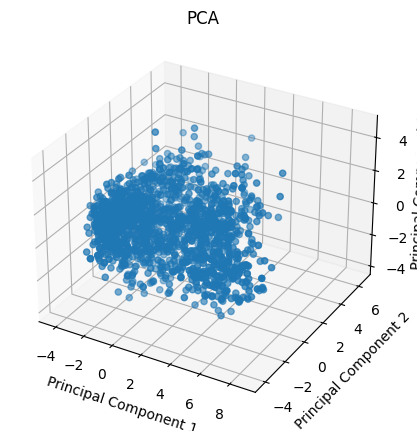

In [47]:
ax1 = pca_df2[:, 0]
ax2 = pca_df2[:, 1]
ax3 = pca_df2[:, 2]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d")
ax.scatter(ax1, ax2, ax3)
plt.title("PCA")
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel(r'Principal Component 3')
ax.zaxis.labelpad = -0.3

# Question 8 - Clustering

### ELBOW method

We apply the ELBOW method to calculate the optimum value for parameter $K$ that will be used for clustering later.

Text(0, 0.5, 'SSE')

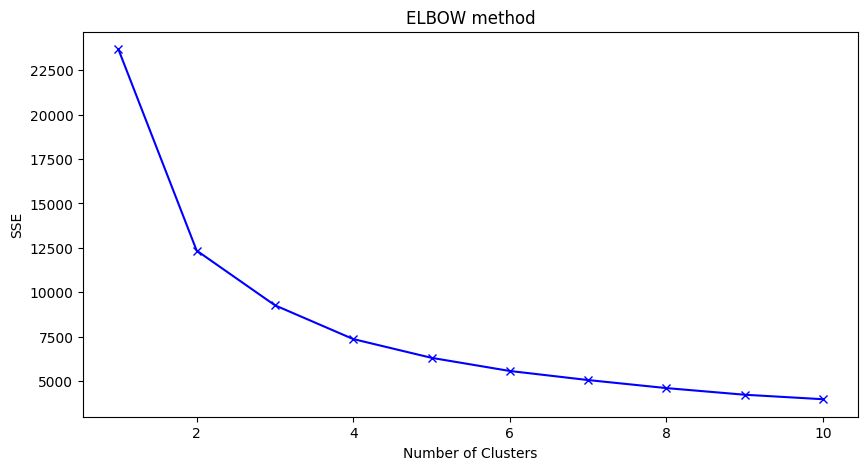

In [48]:
# code from slides with minor changes
K_max = 10

K_range = [i for i in range(1, K_max + 1)]

score = []
for k in K_range:
  kmeans = KMeans(n_clusters=k, n_init=10).fit(pca_df2) # default n_init = 10
  score.append(kmeans.inertia_) # Sum Squared Error (SSE)

fig = plt.figure(figsize=(10, 5))
plt.plot(K_range, score, 'bx-')
plt.title("ELBOW method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

We can see that $K = 4$.

### K-Means clustering

We apply the K-Means clustering algorithm with $K = 4$.

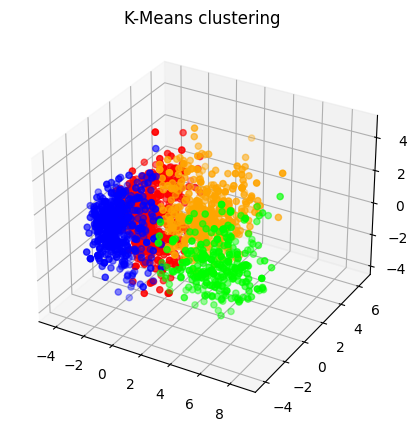

In [49]:
K_opt = 4
kmeans = KMeans(n_clusters=K_opt, n_init=10, random_state=42)
kmeans_t = kmeans.fit_transform(pca_df2)
kmeans_labels = kmeans.labels_

colors = ['red', 'lime', 'blue', 'orange']

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
plt.title("K-Means clustering")

# plotting
for i in range(0, K_opt):
  ax1 = pca_df2[kmeans_labels == i, 0]
  ax2 = pca_df2[kmeans_labels == i, 1]
  ax3 = pca_df2[kmeans_labels == i, 2]
  ax.scatter(ax1, ax2, ax3, c=colors[i])

### Agglomerative clustering

We apply the Agglomerative clustering algorithm with $K = 4$.

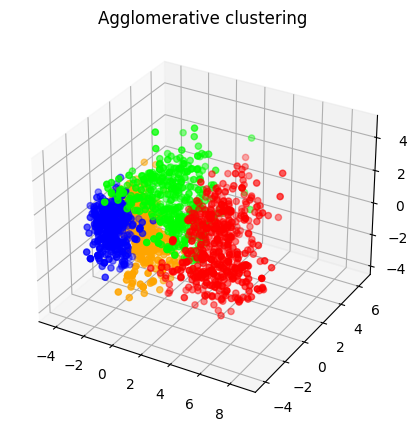

In [50]:
agglomerative = AgglomerativeClustering(n_clusters=K_opt)
agglomerative_labels = agglomerative.fit_predict(pca_df2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
plt.title("Agglomerative clustering")

for i in range(0, K_opt):
  ax1 = pca_df2[agglomerative_labels == i, 0]
  ax2 = pca_df2[agglomerative_labels == i, 1]
  ax3 = pca_df2[agglomerative_labels == i, 2]
  ax.scatter(ax1, ax2, ax3, c=colors[i])

# Question 9 - Customer Profile Analysis (Bonus)

Going back to our initial dataframe and linking clusters to groups of rows.

A new column with the labels is added into our dataframe.

In [51]:
df['Cluster'] = agglomerative_labels

We proceed with plotting the most important feautures, in order to analyse the customer profile of each cluster.

### <code>Age</code> for each cluster

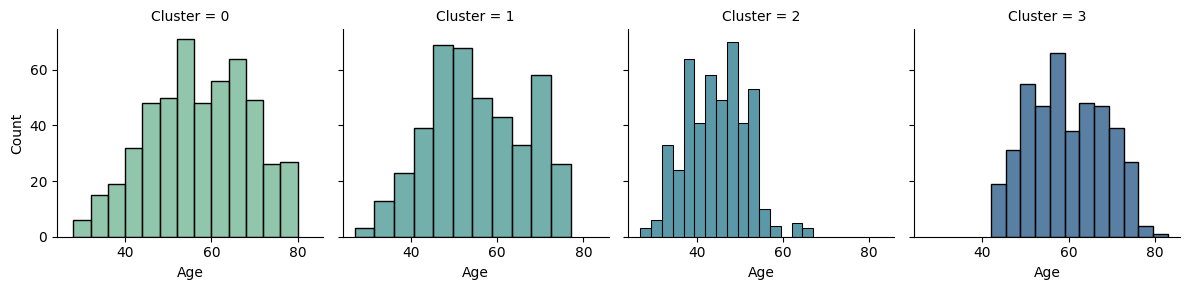

In [52]:
g = sns.FacetGrid(df, col="Cluster", hue="Cluster", palette="crest")
g.map(sns.histplot, "Age")

### <code>Kidhome</code>, <code>Teenhome</code> and <code>Family_Size</code> for each cluster

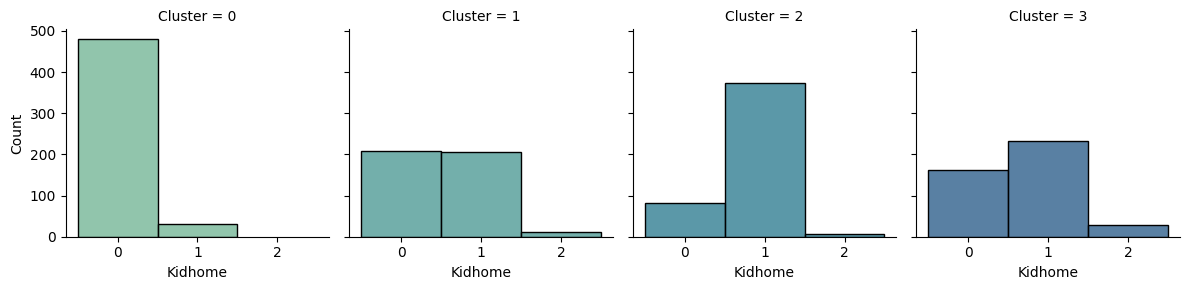

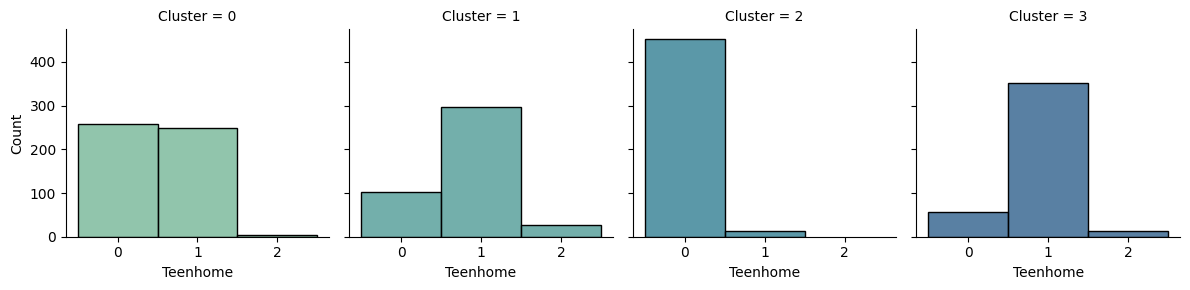

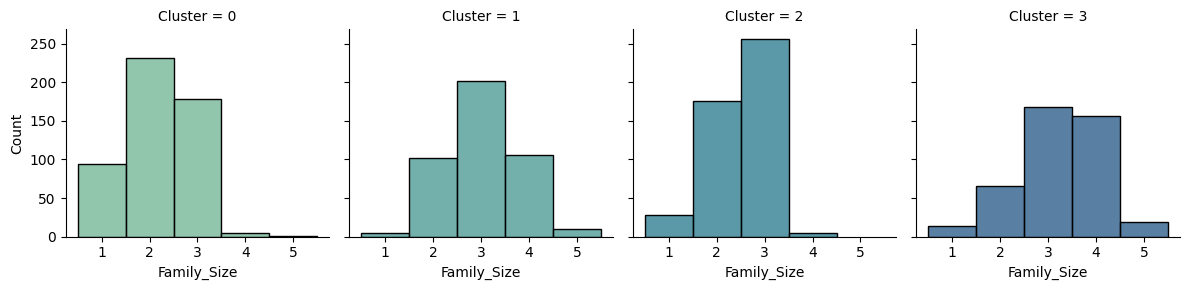

In [53]:
g = sns.FacetGrid(df, col="Cluster", hue="Cluster", palette="crest")
g.map(sns.histplot, "Kidhome", discrete=True)

g = sns.FacetGrid(df, col="Cluster", hue="Cluster", palette="crest")
g.map(sns.histplot, "Teenhome", discrete=True)

g = sns.FacetGrid(df, col="Cluster", hue="Cluster", palette="crest")
g.map(sns.histplot, "Family_Size", discrete=True)

### <code>Spent</code> for each cluster

<Axes: xlabel='Cluster', ylabel='Spent'>

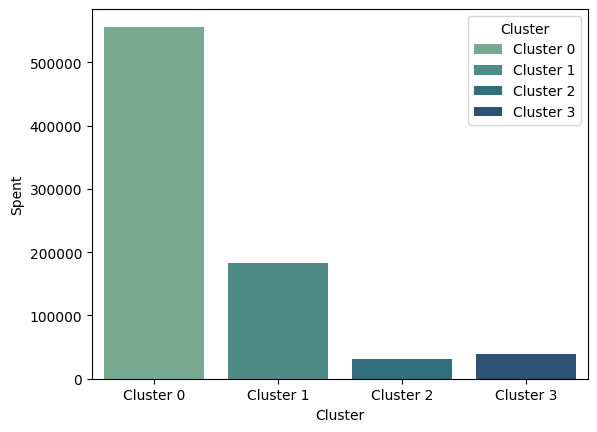

In [54]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
temp_df = pd.DataFrame({'Cluster': labels})
temp_df['Spent'] = df.groupby(['Cluster'])['Spent'].sum()
sns.barplot(temp_df, x='Cluster', y='Spent', hue="Cluster", dodge=False, palette="crest")

### <code>Income</code> for each cluster

<Axes: xlabel='Income', ylabel='Density'>

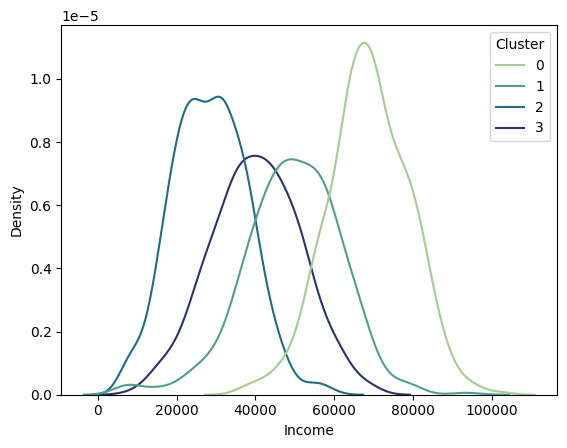

In [55]:
sns.kdeplot(df, x="Income", hue='Cluster', palette="crest")

### <code>Income</code>-<code>Spent</code> for each cluster

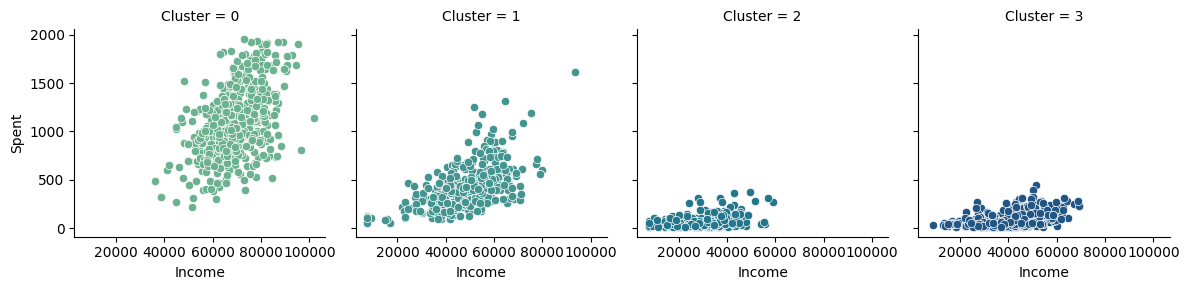

In [56]:
g = sns.FacetGrid(df, col="Cluster", hue="Cluster", palette="crest")
g.map(sns.scatterplot, "Income", "Spent")

### <code>NumWebPurchases</code> and <code>NumStorePurchases</code> for each cluster

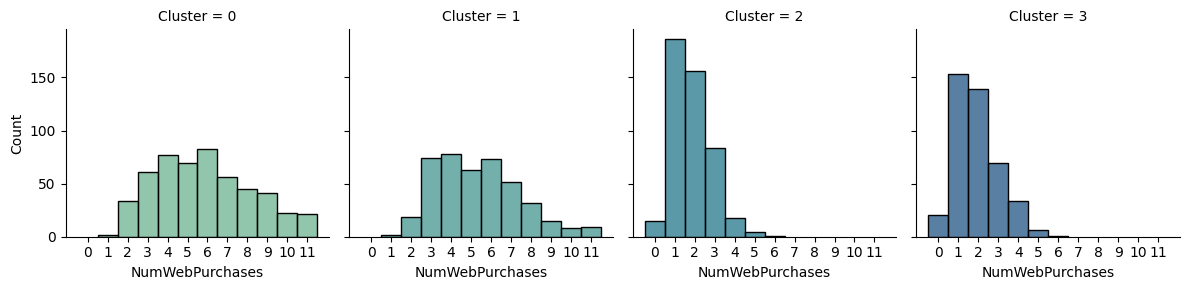

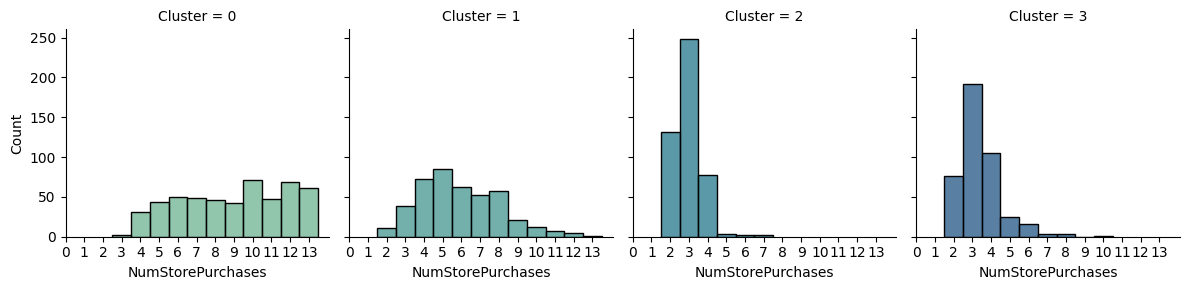

In [57]:
g = sns.FacetGrid(df, col="Cluster", hue="Cluster", palette="crest")
g.map(sns.histplot, "NumWebPurchases", discrete=True)
g.set(xticks=list(range(0, df['NumWebPurchases'].max() + 1)))

g = sns.FacetGrid(df, col="Cluster", hue="Cluster", palette="crest")
g.map(sns.histplot, "NumStorePurchases", discrete=True)
g.set(xticks=list(range(0, df['NumStorePurchases'].max() + 1)))

Text(0.5, 1.0, 'NumStorePurchases')

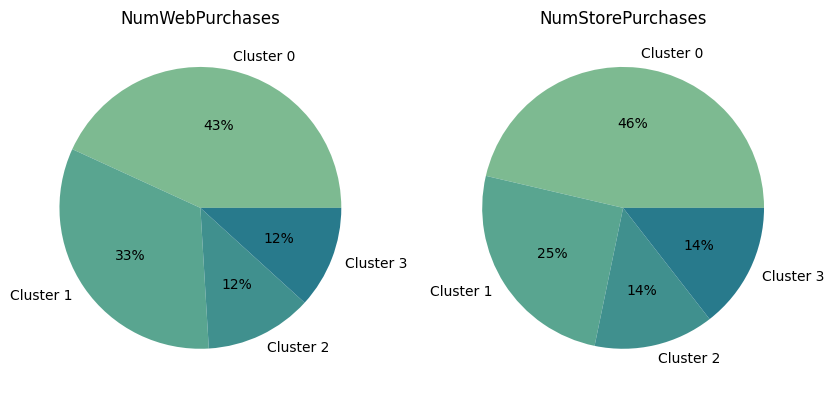

In [58]:
labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
temp_df = pd.DataFrame({'Cluster': labels})
temp_df['NumWebPurchases'] = df.groupby('Cluster')['NumWebPurchases'].sum()
temp_df['NumStorePurchases'] = df.groupby('Cluster')['NumStorePurchases'].sum()

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(1, 2, 1)
plt.pie(temp_df['NumWebPurchases'], labels=temp_df['Cluster'], autopct='%.0f%%', colors=sns.color_palette("crest"))
plt.title("NumWebPurchases")

ax2 = fig.add_subplot(1, 2, 2)
plt.pie(temp_df['NumStorePurchases'], labels=temp_df['Cluster'], autopct='%.0f%%', colors=sns.color_palette("crest"))
plt.title("NumStorePurchases")

### Money spent in each product category for each cluster

In [59]:
temp_df = pd.DataFrame({'Cluster': labels})
temp_columns = ['MntWines', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts']
product_type = ['Wine', 'Fish', 'Fruit', 'Gold', 'Meat', 'Sweet']

for column in temp_columns:
  temp_df[column] = df.groupby(['Cluster'])[column].sum()

temp_df = temp_df.groupby(labels)[temp_columns].sum()
temp_df_2 = temp_df.transpose()
temp_df_2 = temp_df_2.reset_index()
temp_df_2['index'] = pd.DataFrame({'Product_Type': product_type})

Text(0, 0.5, '')

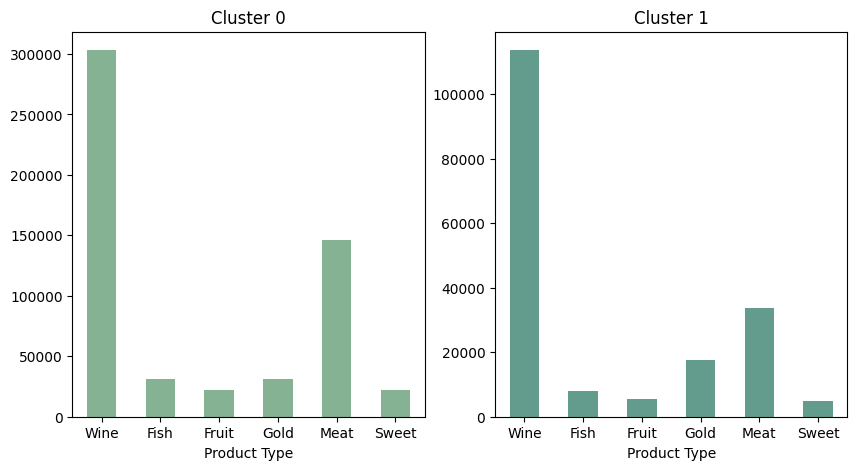

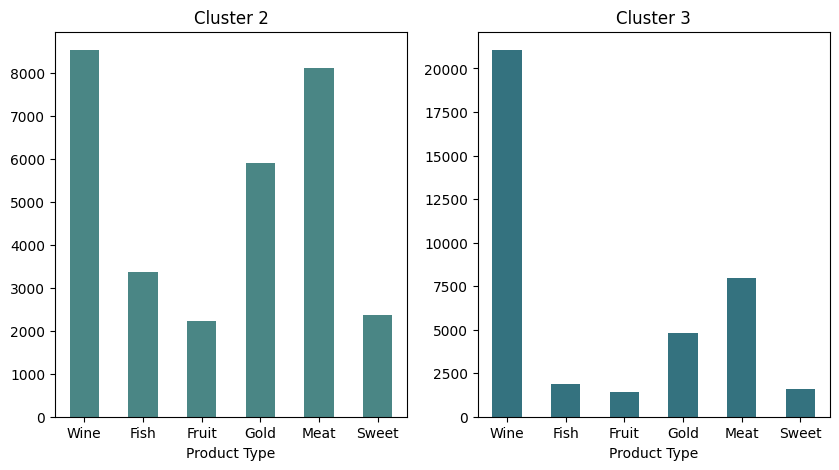

In [60]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(temp_df_2, x='index', y='Cluster 0', dodge=False, width=0.5, color=sns.color_palette("crest")[0], ax=ax1)
plt.title('Cluster 0')
plt.xlabel('Product Type')
plt.ylabel('')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(temp_df_2, x='index', y='Cluster 1', dodge=False, width=0.5, color=sns.color_palette("crest")[1], ax=ax2)
plt.title('Cluster 1')
plt.xlabel('Product Type')
plt.ylabel('')

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
sns.barplot(temp_df_2, x='index', y='Cluster 2', dodge=False, width=0.5, color=sns.color_palette("crest")[2], ax=ax1)
plt.title('Cluster 2')
plt.xlabel('Product Type')
plt.ylabel('')

ax2 = fig.add_subplot(1, 2, 2)
sns.barplot(temp_df_2, x='index', y='Cluster 3', dodge=False, width=0.5, color=sns.color_palette("crest")[3], ax=ax2)
plt.title('Cluster 3')
plt.xlabel('Product Type')
plt.ylabel('')

### Cluster Analysis

**Cluster 0**
- They spend the most.
- They have the highest income.
- They have made many purchases online and in-store.
- They spend the most on wine and meat.
- Most of them don't have any children.

**Cluster 1**
- They spend a lot, but less than **Cluster 0**
- They have an average income.
- They have made many purchases online.
- They have made many purchases in-store, but less than **Cluster 0**.
- They spend the most on wine and meat.
- Most of them have teenagers.

**Cluster 2**
- They spend the least.
- They have the lowest income.
- They have made only a few purchases online and in-store.
- Most of them have one child.
- Most of them don't have any teenagers.
- Their age is between $20$ and $60$.

**Cluster 3**
- They don't spend as much, but they spend more than **Cluster 2**.
- They have a mid-low income.
- They have made only a few purchases online and in-store.
- They spend most on wine and meat.
- Most of them have one teenager at home.
- Their age is between $40$ and $80$.

### Conclusions

**Cluster 0**

This cluster represents the target group for the marketing team of the store, because they spend the most.

They have the highest income, meaning they don't have a limited budget for their purchases. This gives us the opportunity to advertise pricier products of higher quality to them.

Due to the fact that they are mostly spending on wine and meat products, we could promote combinations of products that can be paired with quality wine and meat choices, which could increase the number of purchases in other product categories.
<br></br>

**Cluster 1**

This cluster should be the second target group, because they typically spend a lot, which reflects this group's potential.

Just like the previous group, these customers are mostly spending on wine and meat products. We want to make them buy more products from other categories as well, because this might increase their overall basket size. 

This could be done by promoting deals through the website, because this group doesn't shop in-store as much. These strategies could also attract new customers.
<br></br>

**Cluster 3**

This cluster should not get much attention from the marketing team, because of their low spendings and limited budget.

We can keep these customers, by making offers and deals in products of lower value and quality to them.
<br></br>

**Cluster 2**

Our marketing group can apply similar strategies, in order to increase the customers' basket size.